# Correlation between Bitcoin and Conventional Financial Assets   

Author: David Wang | December 2017
Email: dw1948@stern.nyu.edu

As Bitcoin's rapid increase in price has stirred debate about what it's value is, one question being considered is how to think of this new asset in relation to conventional securities and the market in general. Globally, regulatory bodies have differing stances on whether it is a security, a currency, a commodity, or something else. Some proponents for Bitcoin's value argue that it is a safe-haven asset because it is not affected by market performance and because it is not linked to government policy. In fact, one split from the main Bitcoin blockchain actually named itself Bitocin Gold in a direct reference to gold, the most famous and long-lived safe asset. For instance, one investor believed that millenials would place more trust in Bitcoin than in gold, allowing Bitcoin to continually grow in its capacity to act as a store of value. (https://www.cnbc.com/2017/11/29/bitcoin-could-easily-reach-the-100000-range-strategist-tom-lee.html) A cursory look at Bitcoin's history reveals that when there is geopolitical turmoil (Grexit, Brexit, North Korean Crisis, Venezuelan Instability) there are individuals who believe that the rise in Bitcoin prices can be attributed to people exchanging fiat for Bitcoin. 

On the flipside, others believe the notion that Bitcoin could act as a safe-haven asset is absurd. They point to the fact that it has no underlying value, questionable transaction speeds and fees, a short history, and incredible price volatility as factors preventing it from being a secure long-term store of value. Existing literature in the area has either taken a broad look at relationships across Bitcoin and other assets over time or failed to analyze what the statistics actually mean on a granular level. This project attempts to offer a more in-depth and cohesive analysis of whether Bitcoin is the new digital gold.


## Data Report 
Our data will be coming from two sources. First, we'll use Quandl's bitcoin data since they have compiled a historical composite 
of bitcoin price across different exchanges. This means that the price we will be using will be more accurate and will avoid variance in different exchange pricing. Second, I was originally considering using the google finance API for pulling data, however a combination of awkward query limits and constantly changing access makes it less than ideal. Instead, I simply downloaded daily historical EOD prices from Yahoo Finance, and saved it to my Github. 



## Set-Up

We'll set up what is needed for future code by importing the packages that are needed. Specifically, we'll use scipy to some basic statistical analysis and the quandl package for easy access to their bitcoin data. In addition, we'll avoid hitting query limits on the Quandl API data by adding an API-key.




In [67]:
import pandas as pd
import numpy as np
import quandl
import matplotlib.pyplot as plt
from scipy import stats


quandl.ApiConfig.api_key = 'vwexWUB8qVLgs-5BGnuk'


In [43]:
bitcoindf = quandl.get('BNC3/GWA_BTC', returns="pandas")


Before getting to the analysis, we need a few quick helper methods that will make things run more smoothly. Since we'll be importing dataframes for other assets to compare to Bitcoin, the dates won't be properly aligned because most markets are not open on the weekend while Bitcoin trades 24/7. To alighn the data we'll parse the input data and make use of the merge method.  

In [44]:
def merge(df1, df2):
    df1 = df1.set_index(df1['Date'])

    df1 = df1.drop('Date',1)
    dfcombined = df1.join(df2,lsuffix='Security', rsuffix='Bitcoin')
    dfcombined = dfcombined.dropna()
    return dfcombined


Next, there could be a lot of data that we don't actually need and can obscure the analysis. For instance, it wouldn't make sense to use Volume-Weighted Average Price for Bitcoin when we are using Spot Price for the asset that we are comparing Bitcoin to. To remedy this, we'll parse a newly merged dataframe for the columns representing the closing price. 

In [45]:
def getPriceSeries(df):
    cnames = df.columns.values
    relnames = []
    for name in cnames:
        if ('Close' in name):
            relnames.append(name)
    outputlist = []
    for name in relnames:
        outputlist.append(df[name])

    return outputlist


Now that we have two properly-aligned price series, we can do some quick visualizations. Before we do that, however, we want to be able to get returns data as well. This is because prices are lognormally distributed while returns are normally distributed, which is needed for computing correlation coefficients. We'll add in a lag time to returns so we can compare them at different levels (daily, weekly, monthly, etc). 

In [46]:
def getReturns(s1, s2, lag):
    s1c = s1/s1.shift(lag) - 1
    s2c = s2/s2.shift(lag) - 1
    s1c.dropna
    s2c.dropna
    return [s1c,s2c]


Now that we have everything needed to parse the data into a useable format, we'll have one method that ties everything together. 

In [56]:
def generateGraph(comparison):
    url = 'https://raw.githubusercontent.com/Nihilum123/Data_Bootcamp/master/' + comparison + '.csv'
    parsedates = ['Date']
    df = pd.read_csv(url, error_bad_lines=False, parse_dates=parsedates)

    newdf = merge(df, bitcoindf)
    serieslist = getPriceSeries(newdf)
    returnslist = getReturns(serieslist[0], serieslist[1], 1)

    fig, ax1 = plt.subplots()
    l1, = ax1.plot(serieslist[0], 'c')
    ax2 = ax1.twinx()
    l2, = ax2.plot(serieslist[1], 'k')
    titlevalue = "Bitcoin Historical Price vs " + comparison     
    fig.set_size_inches(13.5, 5.5)

    ax1.set_title(titlevalue, fontsize = 30)
    ax1.set_xlabel('Date', fontsize = 20)
    ax1.set_ylabel(comparison + " Price", fontsize = 20)
    ax2.set_ylabel("Bitcoin Price", fontsize = 20)
    plt.legend([l1,l2],[comparison,'Bitcoin'])
    plt.show()
    plt.close()


Let's try this out on an asset like SPY, which meaures the performance of the S&P 500 and is a good proxy for the general market.

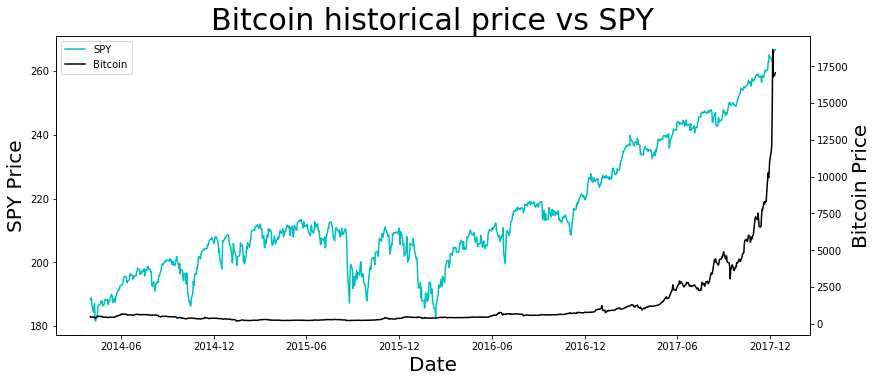

In [57]:
generateGraph('SPY')

Intuitively, Bitcoin and the market should not be correlated since the factors that influence the two respective securities are considered to be very different. However, one common argument for the value of Bitcoin is that it can act as digital gold and function as a safe haven during times of instability. Thus, for our next comparison we'll compare Bitcoin to Gold. 

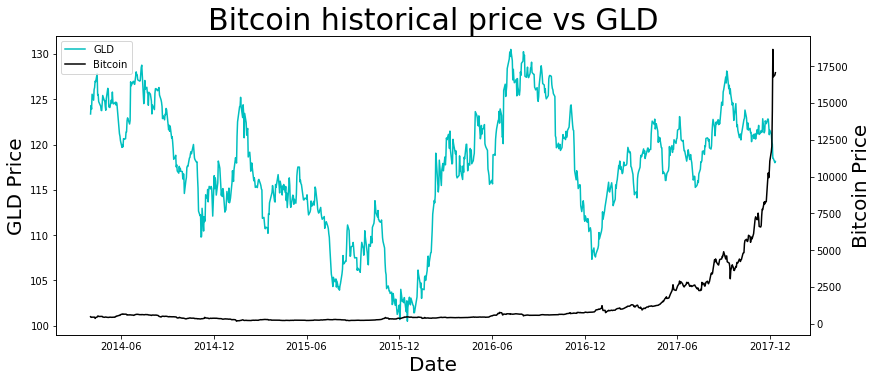

In [58]:
generateGraph('GLD')

It seems that bitcoin is just as uncorrelated with gold as it is with the market in general. The fact that the price of bitcoin over the past few months has gone parabolic could have something to do with the low coefficients we are getting. The simplest thing to start off with is to just take the log of Bitcoin prices.  

In [11]:
def getLogPriceSeries(df):
    cnames = df.columns.values
    relnames = []
    for name in cnames:
        if ('Close' in name):
            relnames.append(name)
    outputlist = []
    for name in relnames:
        outputlist.append(df[name])
    
    outputlist[1] = np.log(outputlist[1])   #take log of Bitcoin price
    return outputlist



Now we simply change the generateGraph method to return the log of the daily Bitcoin price. The rest of the code remains unchanged. 

In [54]:
def generateLogGraph(comparison):
    url = 'https://raw.githubusercontent.com/Nihilum123/Data_Bootcamp/master/' + comparison + '.csv'
    parsedates = ['Date']
    df = pd.read_csv(url, error_bad_lines=False, parse_dates=parsedates)

    newdf = merge(df, bitcoindf)
    serieslist = getLogPriceSeries(newdf)    #acquire Log Bitcoin price
    returnslist = getReturns(serieslist[0], serieslist[1], 1)

    fig, ax1 = plt.subplots()
    l1, = ax1.plot(serieslist[0], 'c')
    ax2 = ax1.twinx()
    l2, = ax2.plot(serieslist[1], 'k')
    titlevalue = "Log Bitcoin Historical Price vs " + comparison 
    fig.set_size_inches(13.5, 5.5)
    ax1.set_title(titlevalue, fontsize = 30)
    ax1.set_xlabel('Date', fontsize = 20)
    ax1.set_ylabel(comparison + " Price", fontsize = 20)
    ax2.set_ylabel("Log Bitcoin Price", fontsize = 20)
    plt.legend([l1,l2],[comparison,'Bitcoin'])
    plt.show()
    plt.close()


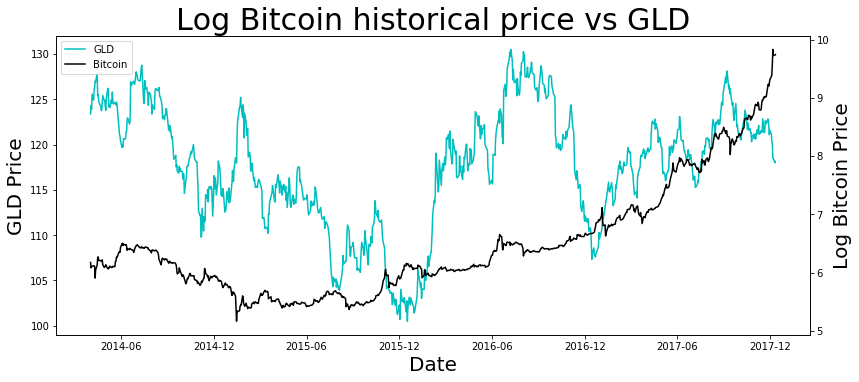

In [55]:
generateLogGraph('GLD')


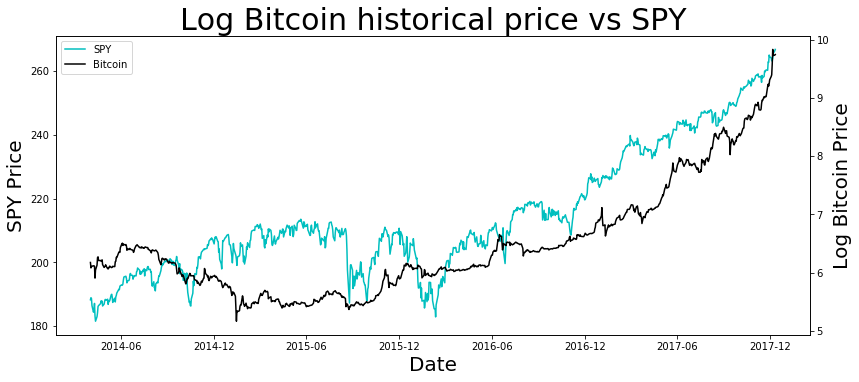

In [59]:
generateLogGraph('SPY')

Taking the log of Bitcoin pice certainly makes the display look much nicer. In fact, it seems that Bitcoin and SPY are pretty tightly correlated. However, since correlations must be done on returns, our graph may not actually be accurate so we'll need an actual correlation function. To be more comprehensive, we'll use both the default Pearson correlation coefficient as well as the less popular Kendall Tau correlation coefficient.  

In [86]:
def generateCorrelation(comparison):
    url = 'https://raw.githubusercontent.com/Nihilum123/Data_Bootcamp/master/' + comparison + '.csv'
    parsedates = ['Date']
    df = pd.read_csv(url, error_bad_lines=False, parse_dates=parsedates)

    newdf = merge(df, bitcoindf)
    serieslist = getPriceSeries(newdf)
    returnslist = getReturns(serieslist[0], serieslist[1], 1)
    print("The Pearson correlation coefficient is " + str(round(returnslist[0].corr(returnslist[1]),3)))
    print("The Kendall Tau correlation coefficient is " + str(round(returnslist[0].corr(returnslist[1],method = 'kendall'),3)))
          

In [87]:
generateCorrelation('SPY')

The Pearson correlation coefficient is 0.018
The Kendall Tau correlation coefficient is -0.011


In [88]:
generateCorrelation('GLD')

The Pearson correlation coefficient is -0.02
The Kendall Tau correlation coefficient is 0.021


As the correlation output shows, the price series shape do not represent an underlying correlation in the two assets. The only conclusion we can draw from the graphs is that both the market and Bitcoin have had a good 2016-2017 and are reaching new highs. The correlation coefficient still remains low. If there is an underlying relationship between Bitcoin and conventional assets it could be obscured for 2 reasons.

1) At the daily level there can be significant noise in the data due to a variety of factors affecting both Bitcoin and the respective markets which are not indicative of general trends.   
2) The meteoric rise in Bitcoin price over time makes finding relationships difficult since the overall upward trajectory masks relationships with conventional assets. 

In order to address noise on a daily level we can change the lookback period to take in returns at different time-frames to try and capture more meaningful trends. Specifically, I picked a lookback of 2 days, 1 week, bi-monthly, monthly and 3 months. This is not exact because we don't have data for every day of the year, so we we assume 5 "data-days" per week and 20 "data-days" per month.  

In [89]:
def optimizeLookback(comparison):
    url = 'https://raw.githubusercontent.com/Nihilum123/Data_Bootcamp/master/' + comparison + '.csv'
    parsedates = ['Date']
    df = pd.read_csv(url, error_bad_lines=False, parse_dates=parsedates)

    newdf = merge(df, bitcoindf)
    serieslist = getLogPriceSeries(newdf)

    lookbacklist = [2,5, 10, 20, 60, 120]
    for lookback in lookbacklist:
        returnslist = getReturns(serieslist[0], serieslist[1], lookback)
        print("At lookback of " + str(lookback) + " trading days the correlation is: " + str(round(returnslist[0].corr(returnslist[1]),3)))


In [90]:
optimizeLookback('SPY')


At lookback of 2 trading days the correlation is: 0.063
At lookback of 5 trading days the correlation is: 0.102
At lookback of 10 trading days the correlation is: 0.177
At lookback of 20 trading days the correlation is: 0.297
At lookback of 60 trading days the correlation is: 0.221
At lookback of 120 trading days the correlation is: 0.184


In [91]:
optimizeLookback('GLD')

At lookback of 2 trading days the correlation is: -0.009
At lookback of 5 trading days the correlation is: -0.066
At lookback of 10 trading days the correlation is: -0.114
At lookback of 20 trading days the correlation is: -0.112
At lookback of 60 trading days the correlation is: 0.031
At lookback of 120 trading days the correlation is: 0.341


Using longer lookback periods seems to increase the correlation between bitcoin and conventional assets. This makes sense since we are avoiding some of the noise available in daily data, where Bitcoin varies a lot. For instance, the correlation for 20 trading days (~1 month) is at .3, which while not high is greater than before. However, the relationship is not exactly a stable one where increasing the lookback increases the correlation, and there is a chance that our optimization of the lookback period is only picking up on different types of noise in the data. Instead of trying to change the lookback period to eliminate noise, we instead try to strip out the drift in time of Bitcoin price. We will attempt to isolate the temporal factor of Bitcoin's exponential increase in price over time by regressing along time as an explanatory variable and taking the residuals to create a new series of Bitcoin price independent of its price over time. We will set up a dummy variable for time define as the number of days that have passed since the first day we began tracking bitcoin price. Then, a quick regression will enable us to calculate the residuals. 

In [65]:
def generateResidual(slope, intercept, data):

    for i in range(len(data)):
        data[i] = data[i] - slope * i - intercept
    return data

In [79]:

def timeregress(comparison):
    url = 'https://raw.githubusercontent.com/Nihilum123/Data_Bootcamp/master/' + comparison + '.csv'
    parsedates = ['Date']
    df = pd.read_csv(url, error_bad_lines=False, parse_dates=parsedates)
    newdf = merge(df, bitcoindf)
    serieslist = getLogPriceSeries(newdf)

    dummytimelist = []
    for i in range(len(serieslist[1])):
        dummytimelist.append(i)

    slope, intercept, r_value, p_value, std_err = stats.linregress(dummytimelist, serieslist[1])
    print('The r-value is ' + str(r_value) + ' for the regression' )
    
    log_bitcoin_price_adj_trend = generateResidual(slope, intercept, serieslist[1])

    returnslist = getReturns(serieslist[0],log_bitcoin_price_adj_trend,1)
    print("The correlation of returns is " + str(round(returnslist[0].corr(returnslist[1]),3)))
    fig, ax1 = plt.subplots()
    l1, = ax1.plot(serieslist[0], 'c')
    ax2 = ax1.twinx()
    l2, = ax2.plot(log_bitcoin_price_adj_trend, 'k')
    titlevalue = "Trend-Adjusted Log Bitcoin Historical Price vs " + comparison
    fig.set_size_inches(13.5, 5.5)
    ax1.set_title(titlevalue, fontsize = 30)
    ax1.set_xlabel('Date', fontsize = 20)
    ax1.set_ylabel(comparison + " Price", fontsize = 20)
    ax2.set_ylabel("Trend-Adjusted Log Bitcoin Price", fontsize = 17)
    plt.legend([l1,l2],[comparison,'Bitcoin'])
    plt.show()
    plt.close()


The r-value is 0.769936901472 for the regression
The correlation of returns is -0.018


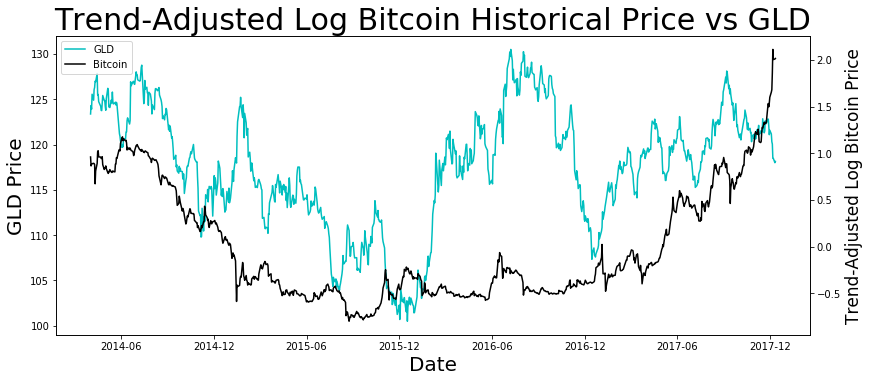

In [80]:
timeregress('GLD')

While passage of time explains a chunk of variance in Bitcoin prices from it's r-value, the low correlation between Bitcoin and gold on a daily level still remains low. Like before, we try to optimize over different lookback periods to try and eliminate noise on the level of daily returns.  

In [93]:
def trendAdjustedoptimizeLookback(comparison):
    url = 'https://raw.githubusercontent.com/Nihilum123/Data_Bootcamp/master/' + comparison + '.csv'
    parsedates = ['Date']
    df = pd.read_csv(url, error_bad_lines=False, parse_dates=parsedates)

    newdf = merge(df, bitcoindf)
    serieslist = getLogPriceSeries(newdf)
    
    dummytimelist = []
    for i in range(len(serieslist[1])):
        dummytimelist.append(i)

    slope, intercept, r_value, p_value, std_err = stats.linregress(dummytimelist, serieslist[1])
    log_bitcoin_price_adj_trend = generateResidual(slope, intercept, serieslist[1])

    returnslist = getReturns(serieslist[0],log_bitcoin_price_adj_trend,1)

    lookbacklist = [2,5, 10, 20, 60, 120]
    for lookback in lookbacklist:
        returnslist = getReturns(serieslist[0], serieslist[1], lookback)
        print("At lookback of " + str(lookback) + " trading days the correlation is: " + str(round(returnslist[0].corr(returnslist[1]),3)))
    

In [30]:
trendAdjustedoptimizeLookback('GLD')

At lookback of 2 trading days the correlation is: -0.03
At lookback of 5 trading days the correlation is: 0.004
At lookback of 10 trading days the correlation is: 0.018
At lookback of 20 trading days the correlation is: 0.028
At lookback of 60 trading days the correlation is: 0.019
At lookback of 120 trading days the correlation is: 0.008


As expected, even after adjusting for both the trend and noise in daily data the correlation remains very low. This indcates that over long periods of time gold and bitcoin are simply not correlated. This leads to the conclusion that in the long run Bitcoin can not be considered a safe haven asset. If it were truly a safe haven asset, we would expect the correlations to be higher and not at a statistically insignificant level.  

A final aspect to consider is if there are points in history where gold and bitcoin were more tightly correlated. We can look at  smaller time periods rather than the entire data-set allowing us to identify increases in correlation that are hopefully driven by events in time. We do that by looking at rolling-correlations on a given lookback and plotting the level over time. We take a 1 month look-back period which was picked because it is a reasonable amount of time for geopolitical crisis to develop and affect financial markets.

In [95]:
def rollingCorrelation(comparison, lookback):
    url = 'https://raw.githubusercontent.com/Nihilum123/Data_Bootcamp/master/' + comparison + '.csv'
    parsedates = ['Date']
    df = pd.read_csv(url, error_bad_lines=False, parse_dates=parsedates)

    newdf = merge(df, bitcoindf)
    serieslist = getLogPriceSeries(newdf)
    returnslist = getReturns(serieslist[0], serieslist[1], 1)
    return pd.rolling_corr(returnslist[0],returnslist[1],window=lookback)


def plotCorrelation(correlationseries, lookback):
    fig, ax1 = plt.subplots()
    fig.set_size_inches(13.5, 5.5)
    ax1.plot(correlationseries, 'c')
    titlevalue = "Historical " + str(lookback) + " day correlation"
    ax1.set_title(titlevalue, fontsize = 30)
    ax1.set_xlabel('Date', fontsize = 20)
    ax1.set_ylabel("Rolling Correlation", fontsize = 20)
    plt.show()
    plt.close()



C:\Users\nihil\Anaconda3.5\lib\site-packages\ipykernel\__main__.py:9: FutureWarning: pd.rolling_corr is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20).corr(other=<Series>)


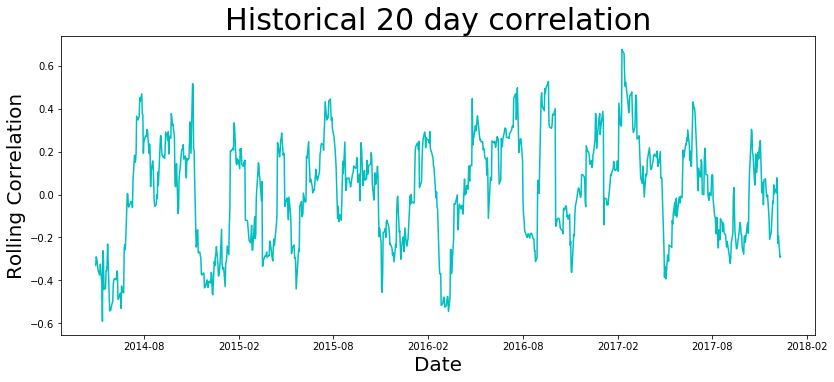

In [96]:
c = rollingCorrelation('GLD', 20)
plotCorrelation(c, 20)


From this we can see that the rolling 20-day correlation varies significantly over time. However, there are certainly periods where it reaches .4-.6, which is fairly significant given the fundamental differences in price pattern and purpose of the securities being considered. To get a better idea of what dates we are looking at when correlation is high, we sort it by the correlation score. 

In [40]:

def sortCorrelation(correlationseries):
    newseries = correlationseries.sort_values(ascending = False)
    newseries = newseries.dropna()
    print(newseries.head(10))
    print(newseries.tail(10))

In [41]:
sortCorrelation(c)

Date
2017-02-09    0.677548
2017-02-10    0.670123
2017-02-13    0.658337
2017-02-14    0.564603
2016-09-20    0.528426
2017-02-16    0.524282
2014-11-03    0.517617
2016-09-19    0.517179
2014-11-04    0.511036
2017-02-17    0.506619
dtype: float64
Date
2016-02-26   -0.517068
2016-03-07   -0.518247
2014-05-30   -0.524712
2016-03-04   -0.525572
2014-06-18   -0.530873
2014-05-28   -0.536402
2014-05-29   -0.538781
2014-05-27   -0.543176
2016-03-11   -0.545234
2014-05-13   -0.590726
dtype: float64


Looking at a sampling of days with high correlations, we can see that they can be clustered into several groups such as July 2016, September 2016, and February 2017. We check the news on the month leading up to those days because the correlations look back a month. The clearest example is Brexit, which occurred in June of 2016. Our data shows that over the next month, correlation between gold and bitcoin increased significantly as the currency risk associated with the unpredicted referendum results sparked interest in alternative assets. Similarly, This means that  days we find that a common theme among those days is geopolitcal tensions. In this regard, we can tentatively say that Bitcoin can become mimicking safe haven assets during times of crises, while in regular times Bitcoin is not related to conventional assets. To shed some further light on this, I explore the number of days where both gold and bitcoin increased in value out of the total number of days that gold appreciated. 

In [110]:
def similarReturn():
    url = 'https://raw.githubusercontent.com/Nihilum123/Data_Bootcamp/master/GLD.csv'
    parsedates = ['Date']
    df = pd.read_csv(url, error_bad_lines=False, parse_dates=parsedates)
    newdf = merge(df, bitcoindf)
    serieslist = getLogPriceSeries(newdf)
    returnslist = getReturns(serieslist[0], serieslist[1], 1)
    
    count_gold_increase = 0
    count_both_increase = 0
    goldreturns = returnslist[0]
    bitcoinreturns = returnslist[1]
    for i in range(len(returnslist[0])):
        if(goldreturns[i] > 0):
            count_gold_increase = count_gold_increase + 1
            if(bitcoinreturns[i] > 0):
                count_both_increase = count_both_increase + 1
    
    print(count_both_increase/count_gold_increase)
                
    


In [111]:
similarReturn()

0.5804347826086956


On the days where gold increased in value, roughly 60% of time bitcoin also increased in value. While in itself this is not proof of any concrete relationship between Bitcoin and Gold it does cohere with our earlier observation that in response to particular geopolitical issues the correlations may increase. 

##Summary

An analysis of the data yields the conclusion that in the long run bitcoin is far from a safe-haven asset. It will not be replacing gold as a store of value or as the go-to asset in the face of uncertainty. However, there is some truth to the fact that it behaves more like a safe-haven asset during times of instability. From this perspective, further research could explore methods of integrating Bitcoin into a comprehensive portfolio as an uncorrelated asset that functions as a safe-haven asset which does not depreciate during market upswings like its conventional counterparts. One important note to consider is that this research does not demonstrate causation, since the rise in correlation during periods of instability could be attributed to speculation rather than hedging or a flight-to-safety.  